<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#¿Qué-es-Prophet?" data-toc-modified-id="¿Qué-es-Prophet?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>¿Qué es Prophet?</a></span></li><li><span><a href="#Carga-y-exploración-de-los-datos" data-toc-modified-id="Carga-y-exploración-de-los-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Carga y exploración de los datos</a></span><ul class="toc-item"><li><span><a href="#Visualizaciones" data-toc-modified-id="Visualizaciones-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Visualizaciones</a></span></li></ul></li><li><span><a href="#Prediccion" data-toc-modified-id="Prediccion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prediccion</a></span><ul class="toc-item"><li><span><a href="#Modelo" data-toc-modified-id="Modelo-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Modelo</a></span><ul class="toc-item"><li><span><a href="#Ajustamos-el-modelo" data-toc-modified-id="Ajustamos-el-modelo-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Ajustamos el modelo</a></span></li><li><span><a href="#Predicciones" data-toc-modified-id="Predicciones-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Predicciones</a></span></li><li><span><a href="#Visualizar-componentes" data-toc-modified-id="Visualizar-componentes-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Visualizar componentes</a></span></li><li><span><a href="#Plot-change-points" data-toc-modified-id="Plot-change-points-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Plot change-points</a></span></li></ul></li><li><span><a href="#Evaluar-del-modelo" data-toc-modified-id="Evaluar-del-modelo-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Evaluar del modelo</a></span><ul class="toc-item"><li><span><a href="#Calculamos-el-RMSE" data-toc-modified-id="Calculamos-el-RMSE-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Calculamos el RMSE</a></span></li></ul></li><li><span><a href="#Hyperparámetros" data-toc-modified-id="Hyperparámetros-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Hyperparámetros</a></span><ul class="toc-item"><li><span><a href="#Añadir-eventos-especiales-o-vacaciones" data-toc-modified-id="Añadir-eventos-especiales-o-vacaciones-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Añadir eventos especiales o vacaciones</a></span></li><li><span><a href="#Añadir-variables-adicionales" data-toc-modified-id="Añadir-variables-adicionales-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Añadir variables adicionales</a></span></li></ul></li></ul></li></ul></div>

In [ ]:
#!pip install fbprophet

In [79]:
import pandas as pd

# Para visualización
#####################################################
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Para crear los modelos
#####################################################
import fbprophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

# Para metricas
#####################################################
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt


# Para evitar warnings
#####################################################
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# ¿Qué es Prophet?

Prophet es una herramienta para hacer predicciones de series temporales de código abierto de Facebook. Prophet descompone las series temporales en tendencia, estacionalidad y vacaciones. Cuenta con hiperparámetros intuitivos que son fáciles de ajustar.

> Serie temporal = Tendencia + Estacionalidad + Vacaciones + error


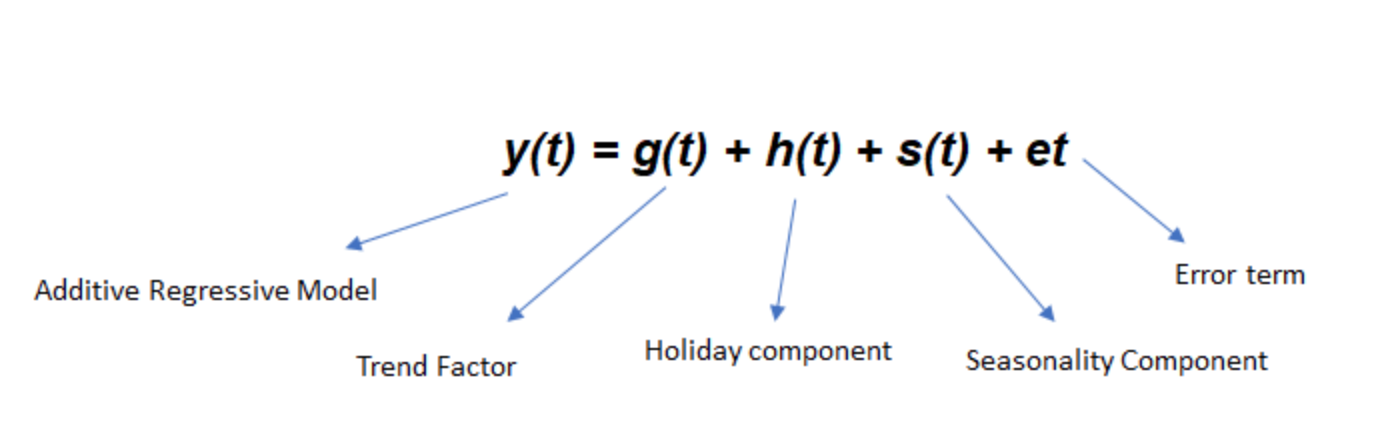

- La `tendencia` modela los cambios no periódicos en el valor de la serie temporal.


- La `estacionalidad` son los cambios periódicos, como la estacionalidad diaria, semanal o anual.


- `Efecto de las vacaciones`, que se producen en horarios irregulares durante un día o un período de días.


- Los términos de `error` son lo que no se explica por el modelo.


Algunas de las funciones útiles presentes en la biblioteca fbprophet:

- `model.fit`: ajusta el modelo con los datos históricos


- `model.predict`: predice los datos basándose en las fechas dadas


- `model.plot_components`: separa las contribuciones de los diferentes componentes del modelo de series temporales y la previsión


- `model.add_seasonality`: cambiar la estacionalidad por defecto


- `model.add_regressors`: añade variables adicionales en el modelo de series temporales


- `model.seasonalities`: añadir variables adicionales en el modelo de series temporales


# Carga y exploración de los datos

In [3]:
df = pd.read_csv('Data/temp_clean.csv')

In [4]:
df.head()

,date,Avg_anomalies
0,1880-01-31,-0.29
1,1880-02-29,-0.18
2,1880-03-31,-0.11
3,1880-04-30,-0.20
4,1880-05-31,-0.12


In [5]:
df.tail()

,date,Avg_anomalies
1663,2018-08-31,0.73
1664,2018-09-30,0.76
1665,2018-10-31,0.99
1666,2018-11-30,0.78
1667,2018-12-31,0.89


In [6]:
df.shape

(1668, 2)

Hay datos de 1668 meses y dos columnas. La primera columna es la fecha y la segunda es la temperatura media en grados Celsius.

In [7]:
# ¿qué frecuencia tienen nuestros datos
pd.infer_freq(df.date)


'M'

## Visualizaciones


Podemos ver claramente la tendencia de la temperatura media a lo largo del tiempo y un patrón estacional mensual de la temperatura. Son patrones que esperamos que el modelo de previsión tenga en cuenta.

In [9]:
fig = px.line(df, x="date", y="Avg_anomalies",  title='Evolución de la tempratura')
fig.show()

# Prediccion

En esta sección, exploraremos el uso del Prophet para pronosticar el conjunto de datos de las anomalías de temperatura.

## Modelo

Para utilizar Prophet para la predicción:

1. Se define y configura un objeto **Prophet()**,


2. Se ajusta en el conjunto de datos llamando a la función **fit()** y pasando los datos.


La función `fit()` toma un DataFrame de datos de series temporales. El DataFrame debe tener un formato específico: 

1. La primera columna debe tener el nombre `ds` y contener las fechas-hora. 


2. La segunda columna debe tener el nombre `y` y contener las observaciones.


### Ajustamos el modelo

In [10]:
# preparamos las columnas como las necesita Prophet
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [11]:
df.head()

,ds,y
0,1880-01-31,-0.29
1,1880-02-29,-0.18
2,1880-03-31,-0.11
3,1880-04-30,-0.20
4,1880-05-31,-0.12


In [12]:
# iniciamos el modelo y lo fiteamos
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -54.0013


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2784.17    0.00211607       110.744      0.6503      0.6503      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169        2794.4   0.000669046       129.122   2.742e-06       0.001      231  LS failed, Hessian reset 
     199       2797.26   2.05312e-05       57.2649       0.142       0.142      266   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     277       2798.82    0.00056925       132.605   4.177e-06       0.001      396  LS failed, Hessian reset 
     294       2799.28   1.82064e-09       98.2704   1.465e-07     0.09791      431   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


### Predicciones

[Aquí](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) una referencia a los alias aceptables del parámetro freq

In [22]:
# We want to predict the next 50 years, so I set a period of 50. In this step I have created a dataframe with the dates of the next 50 years.
future = model.make_future_dataframe(periods= 120, freq='M')
future.tail()

,ds
1783,2028-08-31
1784,2028-09-30
1785,2028-10-31
1786,2028-11-30
1787,2028-12-31


In [23]:
future.shape

(1788, 1)

In [24]:
df.shape

(1668, 2)

In [73]:
# hacemos las predicciones
forecast = model.predict(future)
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.head()

,ds,yhat,yhat_lower,yhat_upper
1783,2028-08-31,0.995005,0.810165,1.178264
1784,2028-09-30,1.008143,0.824052,1.200074
1785,2028-10-31,1.025135,0.849787,1.211707
1786,2028-11-30,1.013607,0.826068,1.212378
1787,2028-12-31,0.992500,0.809029,1.174608


In [26]:
forecast.shape

(1788, 16)

Prophet devuelve un gran DataFrame con muchas columnas interesantes, pero nosotros seleccionaremos nuestra salida a las columnas más relevantes para la previsión, que son

- `ds`: la fecha del valor predicho


- `yhat`: el valor predicho de nuestra métrica (en Estadística, yhat es una notación utilizada tradicionalmente para representar los valores previstos de un valor y)


- `yhat_lower`: el límite inferior de nuestras previsiones


- `yhat_upper`: el límite superior de nuestras previsiones
  
Es de esperar que los valores varíen con respecto a los resultados presentados anteriormente, ya que Prophet se basa en los métodos Markov Chain Monte Carlo (MCMC) para generar sus previsiones. El MCMC es un proceso estocástico, por lo que los valores serán ligeramente diferentes cada vez.


### Visualizar componentes

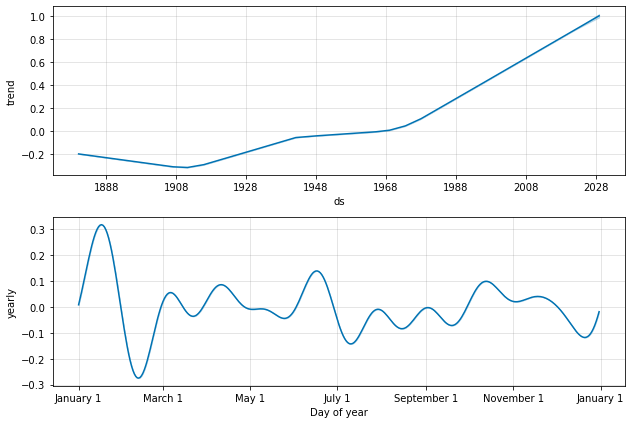

In [27]:
fig1 = model.plot_components(forecast)

**¿Qué significan estos gráficos?**

- Eje X: representa los valores de las fechas (ds ) tanto para la historia como para las fechas futuras.


- Eje "Y": representa la estimación para el componente de predicción respectivo (tendencia, estacionalidad).


- Gráfico 1: valor de la tendencia para todas las fechas (históricas y futuras).


- Gráfico 2: estacionalidad anual, un perfil anual para cada día de la semana basado en los datos de entrenamiento.


Como podemos ver es muy fácil empezar y conseguir un modelo de predicción razonable sobre tus datos de series temporales usando prophet.


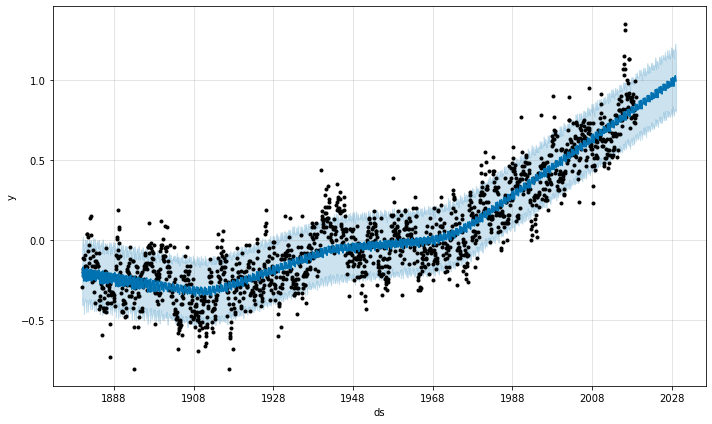

In [28]:
# uncertainty is the error of our predictions
fig1 = model.plot(forecast, uncertainty = True)

### Plot change-points 

Los *change-points* son los puntos fecha-hora en los que las series temporales presentan cambios bruscos en la trayectoria.

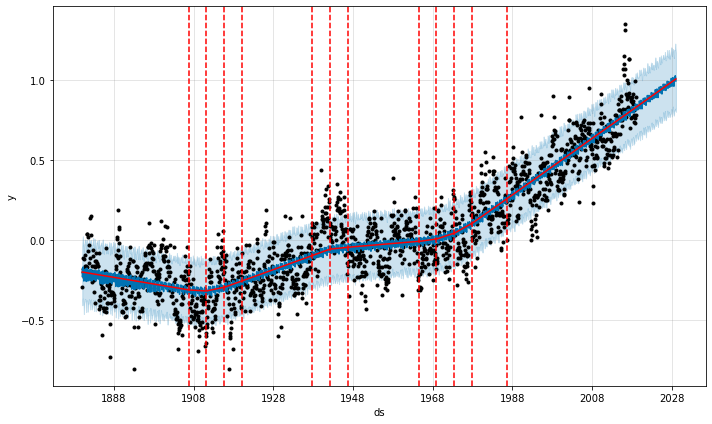

In [29]:
fig4 = model.plot(forecast)
a = add_changepoints_to_plot(fig4.gca(), model, forecast)

In [30]:
pd.DataFrame(model.changepoints).head()

,ds
53,1884-06-30
107,1888-12-31
160,1893-05-31
213,1897-10-31
267,1902-04-30


Este gráfico de Prophet no contiene todos los puntos de cambio, sólo los más importantes. Si quisieramos verlos todos podemos usar el siguiente código:

In [50]:
# listamos todos los chekpoints
deltas = model.params['delta'][0]

cp = pd.DataFrame(model.changepoints) # los sacamos en un dataframe
cp['deltas'] = deltas
fig = go.Figure()

# sacamos la gráfica
fig.add_trace(go.Bar(x=cp['ds'], y=cp['deltas'], name='CPs'))


## Evaluar del modelo

Es fundamental desarrollar una estimación objetiva del rendimiento de un modelo de previsión.

Esto puede lograrse reteniendo algunos datos del modelo, como los últimos 12 años. A continuación, se ajusta el modelo a la primera parte de los datos, se utiliza para hacer predicciones sobre la parte retenida y se calcula una medida de error, como el error absoluto medio entre las previsiones. Por ejemplo, una previsión simulada fuera de la muestra.

La puntuación da una estimación de lo bien que podemos esperar que se comporte el modelo en promedio al hacer una previsión fuera de la muestra.

Podemos hacer esto con los datos de las muestras creando un nuevo DataFrame para el entrenamiento con los últimos 12 meses eliminados.

In [56]:
# creamos el train y el test
train = df.drop(df.index[-12:])
test = df.drop(df.index[:-12])

In [57]:
y_pred = model.predict(test)

In [61]:
# sacamos los valores predichos
y_pred["yhat"].values

array([0.80338237, 0.81701036, 0.83219031, 0.8104537 , 0.79669968,
       0.79260098, 0.81180051, 0.81735702, 0.82612117, 0.84974878,
       0.83976027, 0.80600478])

### Calculamos el RMSE

In [63]:
test["y_pred"] = y_pred["yhat"].values
test.head()

,ds,y,y_pred
1656,2018-01-31,0.77,0.803382
1657,2018-02-28,0.85,0.817010
1658,2018-03-31,0.91,0.832190
1659,2018-04-30,0.87,0.810454
1660,2018-05-31,0.81,0.796700


In [65]:
rmse = sqrt(mean_squared_error(test.y.values, y_pred["yhat"].values))
rmse

0.06955692696859332

In [66]:
fig = px.line(test, x='ds', y=test.columns[1:3])
fig.show()

## Hyperparámetros

### Añadir eventos especiales o vacaciones

Los días festivos y los eventos especiales pueden provocar cambios en una serie temporal. 

Podemos crear una lista de vacaciones personalizada para Prophet creando un marco de datos con dos columnas ds y holiday. Una fila para cada ocurrencia del día festivo


In [70]:
temp_season = pd.DataFrame({
  'holiday': 'temp season',
  'ds': pd.to_datetime(['2014-07-31', '2014-09-16', 
                        '2015-07-31', '2015-09-16',
                        '2016-07-31', '2016-09-16',
                        '2017-07-31', '2017-09-16',
                       '2018-07-31', '2018-09-16',
                        '2019-07-31', '2019-09-16']),
  'lower_window': -1,
  'upper_window': 0,
})
temp_season

,holiday,ds,lower_window,upper_window
0,temp season,2014-07-31,-1,0
1,temp season,2014-09-16,-1,0
2,temp season,2015-07-31,-1,0
3,temp season,2015-09-16,-1,0
4,temp season,2016-07-31,-1,0
5,temp season,2016-09-16,-1,0
6,temp season,2017-07-31,-1,0
7,temp season,2017-09-16,-1,0
8,temp season,2018-07-31,-1,0
9,temp season,2018-09-16,-1,0


La `lower_window` y la `upper_window` extienden las vacaciones a los días cercanos a la fecha. 

- Si queremos incluir un día anterior al día de la fecha, establecemos: 
   > lower_window: -1 upper_window: 0
   
- Si queremos utilizar el día posterior al festivo entonces establecemos: 

    > lower_window: 0 upper_window: 1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -54.0013
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2782.22    0.00853258       236.954      0.7053      0.7053      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2797.52   0.000577927       67.4997           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       2799.47   0.000635921       119.604   8.443e-06       0.001      370  LS failed, Hessian reset 
     299       2799.76   0.000101401       57.5548      0.2839      0.2839      402   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     365       2799.93   1.31817e-05       65.9963   1.812e-07       0.001      525  LS failed, Hessian reset 
     388       2799.94    1.3941e-05        76.106   2.268e-07       0.001      592  LS failed, Hessian rese

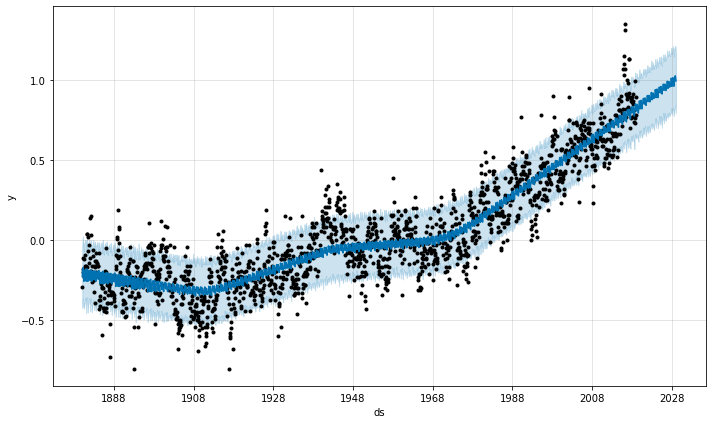

In [77]:
pro_holiday= Prophet(holidays=temp_season)
pro_holiday.fit(df)
future_data = pro_holiday.make_future_dataframe(periods=120, freq = 'M')
 
# predicciones a futuro
forecast_holidays = pro_holiday.predict(future)
forecast_holidays2 = forecast_holidays[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

pro_holiday.plot(forecast_holidays);

In [74]:
forecast.head()

,ds,yhat,yhat_lower,yhat_upper
1783,2028-08-31,0.995005,0.810165,1.178264
1784,2028-09-30,1.008143,0.824052,1.200074
1785,2028-10-31,1.025135,0.849787,1.211707
1786,2028-11-30,1.013607,0.826068,1.212378
1787,2028-12-31,0.992500,0.809029,1.174608


In [78]:
forecast_holidays2.head()

,ds,yhat,yhat_lower,yhat_upper
1783,2028-08-31,0.995281,0.817545,1.200068
1784,2028-09-30,1.008274,0.830682,1.195757
1785,2028-10-31,1.024754,0.834338,1.212080
1786,2028-11-30,1.013186,0.841592,1.203252
1787,2028-12-31,0.992492,0.793271,1.164414


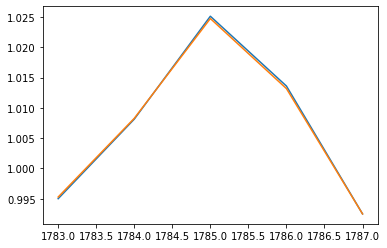

In [81]:
plt.plot(forecast["yhat"])
plt.plot(forecast_holidays2["yhat"])

### Añadir variables adicionales

**NOTA**: En este ejemplo no tenemos regresores externos, por lo que el código siguiente no es aplicable a este ejemplo. 

Hasta ahora el modelo profético no es capaz de modelar algunos de los puntos de los datos de entrenamiento. Sabemos que estos valores se desvían del valor regular debido a los regresores externos (regr1, regr2).

Veamos ahora cómo capturar estos valores y modelarlos.


- De forma similar a las estacionalidades, prophet también tiene una forma de capturar/modelar los factores externos que tienen un efecto sobre el valor objetivo utilizando la función Prophet.add_regressors.


- En los datos de muestra que estamos utilizando hemos mencionado que hay dos regresores externos que están afectando al valor objetivo.


- Para modelar y predecir los efectos de los regresores, tanto el marco de datos de entrenamiento como el de predicción deben contener los datos de los regresores.


- Veamos ahora cómo modelar estos regresores utilizando la función anterior.


**Nota** : Los regresores deben ser valores numéricos, tendrá que realizar una codificación en caliente si el regresor contiene datos de cadena.

In [ ]:
model3 = Prophet()
model3.add_regressor('CO2') # CO2 es la variable que creemos que es importante

In [ ]:
# fiteamos y predecimos
model3.fit(full)
forecast3 = model3.predict(full["CO2"])